In [2]:
pip install numpy-stl

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [3]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import numpy as np
import matplotlib.style as mplstyle
mplstyle.use('fast')

In [18]:
fin = mesh.Mesh.from_file('Fin #2.stl')

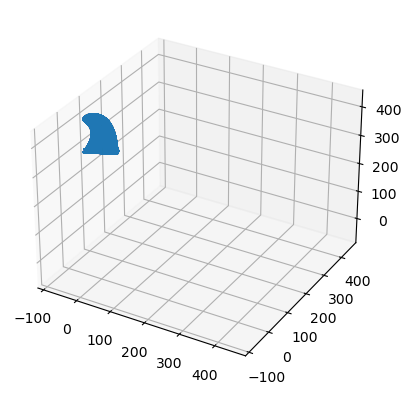

In [4]:
# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(fin.vectors))

# Auto scale to the mesh size
scale = fin.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [24]:
fin = mesh.Mesh.from_file('Fin #2.stl')

cog = fin.get_mass_properties()[1]
print(cog)
stl_shape = fin.vectors.shape
print(stl_shape)
cog_vector = np.full((stl_shape), cog)


print(fin.vectors)
print(fin.points)
fin.vectors = fin.vectors - cog_vector
print("\n change \n")
print(fin.vectors)
print(fin.points)

[ 10.82464705   1.15646128 417.24286416]
(1946554, 3, 3)
[[[-15.921451  -38.680214  372.12125  ]
  [-15.797986  -38.678024  372.08932  ]
  [-15.803666  -38.779305  372.1305   ]]

 [[-15.821668  -38.529087  372.05762  ]
  [-15.96924   -38.52952   372.09128  ]
  [-15.999004  -38.34636   372.07095  ]]

 [[-15.999004  -38.34636   372.07095  ]
  [-15.812764  -38.326885  372.02594  ]
  [-15.821668  -38.529087  372.05762  ]]

 ...

 [[ 16.87767    22.724632  431.55725  ]
  [ 16.983465   22.764446  431.64233  ]
  [ 17.012794   22.659359  431.57108  ]]

 [[ 53.5526     -7.754442  431.6635   ]
  [ 53.344093   -7.7043295 431.6405   ]
  [ 53.495583   -7.872722  431.57727  ]]

 [[ 53.495583   -7.872722  431.57727  ]
  [ 53.344093   -7.7043295 431.6405   ]
  [ 53.31761    -7.8312473 431.5571   ]]]
[[-15.921451  -38.680214  372.12125   ... -15.803666  -38.779305
  372.1305   ]
 [-15.821668  -38.529087  372.05762   ... -15.999004  -38.34636
  372.07095  ]
 [-15.999004  -38.34636   372.07095   ... -15.

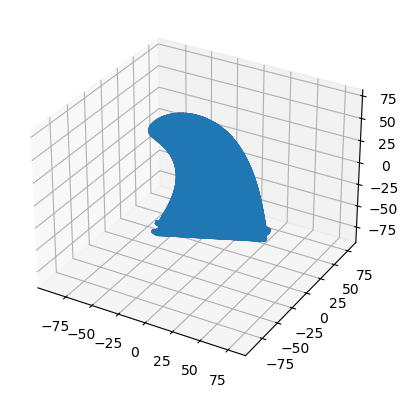

In [25]:
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(fin.vectors))

# Auto scale to the mesh size
scale = fin.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [26]:
fin.save('fin_cog.stl')